In [3]:
#Importing necessary libraries 
import keras
import numpy as np
import pandas as pd
from keras.applications import VGG16, inception_v3, resnet50, mobilenet
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os 
import glob
import tifffile as tif
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tempfile import TemporaryFile
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1

Using TensorFlow backend.


In [4]:
# dataset
dataset = []
paths = []
labels = []
input_size = 64
input_size = 64
num_channel = 13
# getting paths of stored images 
def read_files(path):
    for dirpath, dirnames, filenames in os.walk(path):
    #print('Current path: ', dirpath)
    #print('Directories: ', dirnames)
    #print('Files: ', filenames)
    #print(dirpath)
       #os.chdir(dirpath)
       paths.append(dirpath)
       
     
read_files('/home/sachin_sharma/Desktop/exp2_tif')
paths.sort()
paths = paths[1:]
file_names = []

In [5]:
print(paths)

['/home/sachin_sharma/Desktop/exp2_tif/Else', '/home/sachin_sharma/Desktop/exp2_tif/Industrial', '/home/sachin_sharma/Desktop/exp2_tif/Residential']


In [6]:
# Converting 13 channel images to np array
def img_array(paths):
    print('{}'.format(paths))
    os.chdir('{}'.format(paths))
    for file in glob.glob("*.tif"):
            #print('name of file: '+ file)
            file_names.append(file)
            x = tif.imread('{}'.format(file))
            basename, ext = os.path.splitext(file)
            labels.append(basename)
            x = np.resize(x, (64, 64, 13))
            dataset.append(x)

#calling
for pths in paths:
    img_array(pths)


/home/sachin_sharma/Desktop/exp2_tif/Else
/home/sachin_sharma/Desktop/exp2_tif/Industrial
/home/sachin_sharma/Desktop/exp2_tif/Residential


In [7]:
# lets see the shape of random element in a dataset
print(dataset[400].shape)

(64, 64, 13)


In [7]:
# Getting the list of max pixel value in each image
""""max_pixel_val = []
def max_pixel(data):
    max_pixel_val.append(np.amax(data))
   
# calling 
for data in dataset:
    max_pixel(data)"""

'"max_pixel_val = []\ndef max_pixel(data):\n    max_pixel_val.append(np.amax(data))\n   \n# calling \nfor data in dataset:\n    max_pixel(data)'

In [9]:
"""# max of all pixel values
max_all_pixel_value = max(max_pixel_val) 
print('max pixel value from all 13 band images: ',max_all_pixel_value)"""

max pixel value from all 13 band images:  28002


In [8]:
# Normalizing
"""X_nparray = np.array(dataset).astype(np.float64)
X_mean = np.mean(X_nparray, axis=(0,1,2))
X_std = np.std(X_nparray, axis=(0,1,2))

X_nparray -= X_mean
X_nparray /= X_std

print(X_nparray.shape)
print(X_mean.shape)"""

(28988, 64, 64, 13)
(13,)


In [8]:
X_nparray = np.array(dataset)


In [9]:


#print(type(X_mean))
print(X_mean)
#print(X_std)

NameError: name 'X_mean' is not defined

In [39]:
print(np.mean(X_nparray, axis=(0,1,2)))
#print(np.std(X_nparray, axis=(0,1,2)))

[-9.46398206e-13  7.74425898e-13  2.95134115e-14 -4.64246698e-13
 -3.94404213e-12 -6.04875067e-12 -2.91569061e-11  1.90276346e-11
  7.92099959e-12 -3.30594483e-10  4.43646169e-12  7.26433773e-12
  6.84944891e-12]


In [10]:
# label encoding
lbl_encoder = LabelEncoder()
ohe = OneHotEncoder()
    

In [11]:
# assigning labels to each image
labels_1 = []
for l in labels:
    labels_1.append(l.split("_")[0])

lbl_list = lbl_encoder.fit_transform(labels_1)
Y = ohe.fit_transform(lbl_list.reshape(-1,1)).toarray().astype(int)


/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
# labels
print(Y[21500])

[0 1 0]


In [13]:
# splitting the dataset into training set test set
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X_nparray, Y, test_size = 0.4, random_state = 0)


In [14]:
# Trained data shape
print(train_data.shape)


(17392, 64, 64, 13)


In [15]:
# test data shape
print(test_data.shape)

(11596, 64, 64, 13)


In [16]:
# train labels shape
print(train_labels.shape)
# some first 10 hot encodings
print(train_labels[:10])

(17392, 3)
[[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [17]:
# test label shape
print(test_labels.shape)

(11596, 3)


In [18]:
# hyperparameters
batch_size = 50
num_classes = 3
epochs = 20
input_shape = (input_size, input_size, num_channel)
l1_lambda = 0.00003

In [19]:
# model
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))         
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))    
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 64, 64, 13)        52        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        3392      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               31490560  
__________

In [20]:
# fitting model
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_data, test_labels),
          )
         

Train on 17392 samples, validate on 11596 samples
Epoch 1/20
  350/17392 [..............................] - ETA: 17:25 - loss: 3.6945 - acc: 0.6686

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190480). Check your callbacks.
  % delta_t_median)


17392/17392 [==============================] - 35s 2ms/step - loss: 4.1422 - acc: 0.7424 - val_loss: 4.2383 - val_acc: 0.7381
Epoch 2/20
17392/17392 [==============================] - 13s 741us/step - loss: 4.1378 - acc: 0.7441 - val_loss: 4.2307 - val_acc: 0.7381
Epoch 3/20
17392/17392 [==============================] - 13s 755us/step - loss: 4.1321 - acc: 0.7441 - val_loss: 4.2266 - val_acc: 0.7381
Epoch 4/20
17392/17392 [==============================] - 13s 754us/step - loss: 4.1289 - acc: 0.7441 - val_loss: 4.2242 - val_acc: 0.7381
Epoch 5/20
17392/17392 [==============================] - 13s 755us/step - loss: 2.0120 - acc: 0.7692 - val_loss: 0.3888 - val_acc: 0.7905
Epoch 6/20
17392/17392 [==============================] - 13s 757us/step - loss: 0.3811 - acc: 0.7953 - val_loss: 0.3829 - val_acc: 0.7942
Epoch 7/20
17392/17392 [==============================] - 13s 732us/step - loss: 0.7027 - acc: 0.8056 - val_loss: 1.6895 - val_acc: 0.8236
Epoch 8/20
17392/17392 [================

In [21]:
# saving the model
os.chdir('/home/sachin_sharma/Desktop')
model.save('exp2_c1.h5')

In [22]:
# scores
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20147273086831255
Test accuracy: 0.8750431183166609


In [23]:
# Confusion Matrix and Classification report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1) # predictions
print('Confusion Matrix')
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["Else", "Industrial", "Residential"])
print(df)

Confusion Matrix
             Else  Industrial  Residential
Else         8559           0            0
Industrial      8        1587            2
Residential     4        1435            1


In [24]:
# Classification Report
print('Classification Report')
target_names = ['Else','Industrial','Residential']
classificn_report = classification_report(test_labels.argmax(axis=1), y_pred, target_names=target_names)
print(classificn_report)


Classification Report
              precision    recall  f1-score   support

        Else       1.00      1.00      1.00      8559
  Industrial       0.53      0.99      0.69      1597
 Residential       0.33      0.00      0.00      1440

   micro avg       0.88      0.88      0.88     11596
   macro avg       0.62      0.66      0.56     11596
weighted avg       0.85      0.88      0.83     11596



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


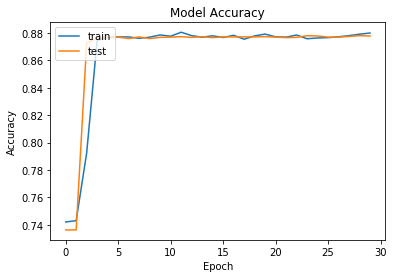

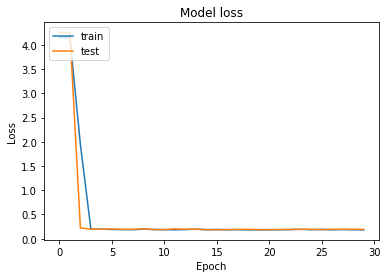

In [26]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('classifcn.png')

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()